In [125]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
db = mysql.connector.connect(
   host="localhost",
   user="root",
   passwd="paswwd"
)

print(db)

In [126]:
db.autocommit = True


In [127]:
#: Create the cursor
mycursor = db.cursor()

In [128]:
def reConnect():
	global db
	global mycursor
	#: Create the connection
	db = mysql.connector.connect( host="localhost", user="root",passwd="paswwd")
	db.autocommit = True
	#: Create the cursor
	mycursor = db.cursor()


In [129]:
def rowToDict( row: tuple, names: list ) -> dict:
	#: Declare variables
	output = {}
	index = 0
	#: Loop for each
	for n in names:
		#: Read the value
		output[n] = row[index]
		index += 1
	#: Return the output
	return output

In [130]:
def dbExecute( sql: str, params: tuple ):
	mycursor.execute( sql, params )


In [131]:
def dbInsert( sql: str, params: tuple ) -> int:
	mycursor.execute( sql, params )
	return int(mycursor.lastrowid)


In [132]:
def dbSelect( sql: str, params: tuple ):
	try:
		mycursor.execute( sql, params )
		myresult = mycursor.fetchall()
	except:
		reConnect()
	finally:
		mycursor.execute( sql, params )
		myresult = mycursor.fetchall()

	return myresult, [i[0] for i in mycursor.description]

# EDA

In [133]:
data = dbSelect('select * from `eda`.customers c Inner join `eda`.payments m on c.customerNumber = m.customerNumber Inner join `eda`.orders o on c.customerNumber = o.customerNumber Inner Join `eda`.orderdetails d on o.orderNumber = d.orderNumber Inner join `eda`.products i on i.productCode = d.productCode Inner join `eda`.productlines j on j.productLine = i.productLine order by c.customerNumber;',())[0]

In [134]:
cols  = dbSelect('select * from `eda`.customers c Inner join `eda`.payments m on c.customerNumber = m.customerNumber Inner join `eda`.orders o on c.customerNumber = o.customerNumber Inner Join `eda`.orderdetails d on o.orderNumber = d.orderNumber Inner join `eda`.products i on i.productCode = d.productCode Inner join `eda`.productlines j on j.productLine = i.productLine order by c.customerNumber;',())[1]

In [135]:
df = pd.DataFrame(data, columns=cols)

In [136]:
df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,...,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,productLine,textDescription,htmlDescription,image
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
1,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Red Start Diecast,Features include opening and closing doors. Co...,8164,56.76,132.00,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
2,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Gearbox Collectibles,This model features working front and rear sus...,8990,62.16,141.28,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
3,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:24,Carousel DieCast Legends,This diecast model of the 1966 Shelby Cobra 42...,8197,29.18,50.31,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
4,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,496,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',None,Auckland,None,None,...,1:12,Unimax Art Galleries,"Official logos and insignias, saddle bags loca...",9997,66.27,150.62,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
12011,496,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',None,Auckland,None,None,...,1:18,Welly Diecast Productions,Intricately detailed with chrome accents and t...,4357,24.23,60.57,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
12012,496,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',None,Auckland,None,None,...,1:24,Autoart Studio Design,Detailed scale replica with working suspension...,7003,60.86,112.70,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
12013,496,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',None,Auckland,None,None,...,1:24,Highway 66 Mini Classics,Detailed scale replica with working suspension...,15,37.32,76.17,Motorcycles,Our motorcycles are state of the art replicas ...,None,None


In [137]:
df.shape

(12015, 42)

In [138]:
df.describe()

,customerNumber,salesRepEmployeeNumber,customerNumber,orderNumber,customerNumber,orderNumber,quantityOrdered,orderLineNumber,quantityInStock
count,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000
mean,215.120766,1371.124594,215.120766,10268.484811,215.120766,10268.484811,35.367873,6.499625,5040.524761
std,111.147663,148.867417,111.147663,97.069082,111.147663,97.069082,9.653278,4.215497,2907.560501
min,103.000000,1165.000000,103.000000,10100.000000,103.000000,10100.000000,6.000000,1.000000,15.000000
25%,141.000000,1286.000000,141.000000,10182.000000,141.000000,10182.000000,27.000000,3.000000,2378.000000
50%,145.000000,1370.000000,145.000000,10273.000000,145.000000,10273.000000,35.000000,6.000000,5330.000000
75%,298.000000,1501.000000,298.000000,10358.000000,298.000000,10358.000000,43.000000,9.000000,7689.000000
max,496.000000,1702.000000,496.000000,10425.000000,496.000000,10425.000000,97.000000,18.000000,9997.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerNumber          12015 non-null  int64 
 1   customerName            12015 non-null  object
 2   contactLastName         12015 non-null  object
 3   contactFirstName        12015 non-null  object
 4   phone                   12015 non-null  object
 5   addressLine1            12015 non-null  object
 6   addressLine2            1827 non-null   object
 7   city                    12015 non-null  object
 8   state                   4750 non-null   object
 9   postalCode              11545 non-null  object
 10  country                 12015 non-null  object
 11  salesRepEmployeeNumber  12015 non-null  int64 
 12  creditLimit             12015 non-null  object
 13  customerNumber          12015 non-null  int64 
 14  checkNumber             12015 non-null  object
 15  pa

In [140]:
df.dtypes

customerNumber             int64
customerName              object
contactLastName           object
contactFirstName          object
phone                     object
addressLine1              object
addressLine2              object
city                      object
state                     object
postalCode                object
country                   object
salesRepEmployeeNumber     int64
creditLimit               object
customerNumber             int64
checkNumber               object
paymentDate               object
amount                    object
orderNumber                int64
orderDate                 object
requiredDate              object
shippedDate               object
status                    object
comments                  object
customerNumber             int64
orderNumber                int64
productCode               object
quantityOrdered            int64
priceEach                 object
orderLineNumber            int64
productCode               object
productNam

In [141]:
df["amount"] = pd.to_numeric(df["amount"])
df["priceEach"] = pd.to_numeric(df["priceEach"])
df["quantityInStock"] = pd.to_numeric(df["quantityInStock"])
df["buyPrice"] = pd.to_numeric(df["buyPrice"])
df["MSRP"] = pd.to_numeric(df["MSRP"])


In [142]:
df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,...,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,productLine,textDescription,htmlDescription,image
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
1,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Red Start Diecast,Features include opening and closing doors. Co...,8164,56.76,132.00,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
2,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Gearbox Collectibles,This model features working front and rear sus...,8990,62.16,141.28,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
3,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:24,Carousel DieCast Legends,This diecast model of the 1966 Shelby Cobra 42...,8197,29.18,50.31,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
4,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,...,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None


<AxesSubplot:>

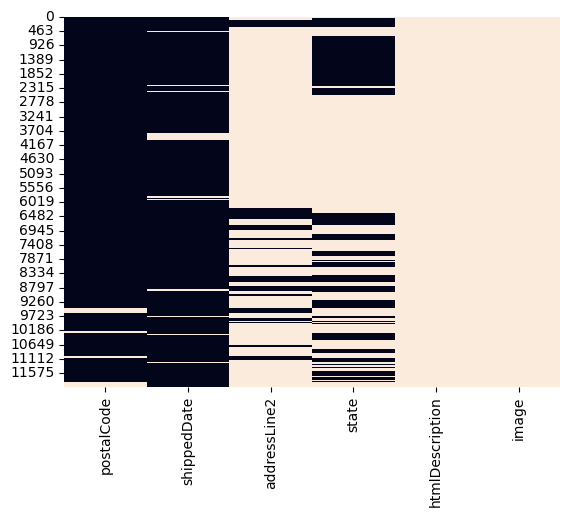

In [144]:
df.isnull().sum()
nulls = df[['postalCode','shippedDate','addressLine2','state','htmlDescription','image']].isnull()
sns.heatmap(nulls, cbar=False)

In [145]:
df = df.drop(['customerNumber', 'checkNumber', 'addressLine2','state','htmlDescription','image','orderNumber','orderLineNumber'], axis=1)


In [146]:
df

,customerName,contactLastName,contactFirstName,phone,addressLine1,city,postalCode,country,salesRepEmployeeNumber,creditLimit,...,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,productLine,textDescription
0,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1965 Aston Martin DB5,Classic Cars,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...
1,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1999 Indy 500 Monte Carlo SS,Classic Cars,1:18,Red Start Diecast,Features include opening and closing doors. Co...,8164,56.76,132.00,Classic Cars,Attention car enthusiasts: Make your wildest c...
2,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1948 Porsche Type 356 Roadster,Classic Cars,1:18,Gearbox Collectibles,This model features working front and rear sus...,8990,62.16,141.28,Classic Cars,Attention car enthusiasts: Make your wildest c...
3,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1966 Shelby Cobra 427 S/C,Classic Cars,1:24,Carousel DieCast Legends,This diecast model of the 1966 Shelby Cobra 42...,8197,29.18,50.31,Classic Cars,Attention car enthusiasts: Make your wildest c...
4,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1965 Aston Martin DB5,Classic Cars,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',Auckland,None,New Zealand,1612,110000.00,...,2002 Suzuki XREO,Motorcycles,1:12,Unimax Art Galleries,"Official logos and insignias, saddle bags loca...",9997,66.27,150.62,Motorcycles,Our motorcycles are state of the art replicas ...
12011,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',Auckland,None,New Zealand,1612,110000.00,...,1936 Harley Davidson El Knucklehead,Motorcycles,1:18,Welly Diecast Productions,Intricately detailed with chrome accents and t...,4357,24.23,60.57,Motorcycles,Our motorcycles are state of the art replicas ...
12012,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',Auckland,None,New Zealand,1612,110000.00,...,1997 BMW R 1100 S,Motorcycles,1:24,Autoart Studio Design,Detailed scale replica with working suspension...,7003,60.86,112.70,Motorcycles,Our motorcycles are state of the art replicas ...
12013,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',Auckland,None,New Zealand,1612,110000.00,...,1960 BSA Gold Star DBD34,Motorcycles,1:24,Highway 66 Mini Classics,Detailed scale replica with working suspension...,15,37.32,76.17,Motorcycles,Our motorcycles are state of the art replicas ...


In [147]:
df.head()

,customerName,contactLastName,contactFirstName,phone,addressLine1,city,postalCode,country,salesRepEmployeeNumber,creditLimit,...,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,productLine,textDescription
0,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1965 Aston Martin DB5,Classic Cars,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...
1,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1999 Indy 500 Monte Carlo SS,Classic Cars,1:18,Red Start Diecast,Features include opening and closing doors. Co...,8164,56.76,132.00,Classic Cars,Attention car enthusiasts: Make your wildest c...
2,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1948 Porsche Type 356 Roadster,Classic Cars,1:18,Gearbox Collectibles,This model features working front and rear sus...,8990,62.16,141.28,Classic Cars,Attention car enthusiasts: Make your wildest c...
3,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1966 Shelby Cobra 427 S/C,Classic Cars,1:24,Carousel DieCast Legends,This diecast model of the 1966 Shelby Cobra 42...,8197,29.18,50.31,Classic Cars,Attention car enthusiasts: Make your wildest c...
4,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,44000,France,1370,21000.00,...,1965 Aston Martin DB5,Classic Cars,1:18,Classic Metal Creations,Die-cast model of the silver 1965 Aston Martin...,9042,65.96,124.44,Classic Cars,Attention car enthusiasts: Make your wildest c...


In [148]:
df.dtypes

customerName               object
contactLastName            object
contactFirstName           object
phone                      object
addressLine1               object
city                       object
postalCode                 object
country                    object
salesRepEmployeeNumber      int64
creditLimit                object
paymentDate                object
amount                    float64
orderDate                  object
requiredDate               object
shippedDate                object
status                     object
comments                   object
productCode                object
quantityOrdered             int64
priceEach                 float64
productCode                object
productName                object
productLine                object
productScale               object
productVendor              object
productDescription         object
quantityInStock             int64
buyPrice                  float64
MSRP                      float64
productLine   

<AxesSubplot:>

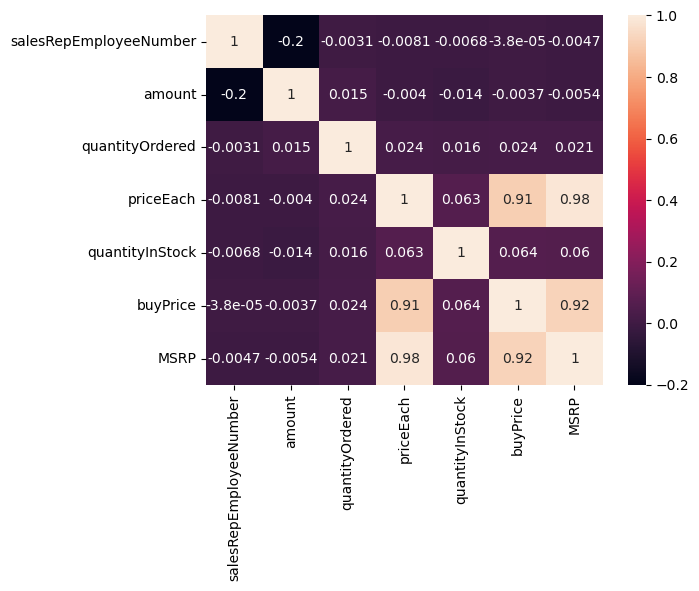

In [149]:
corr = df.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:>

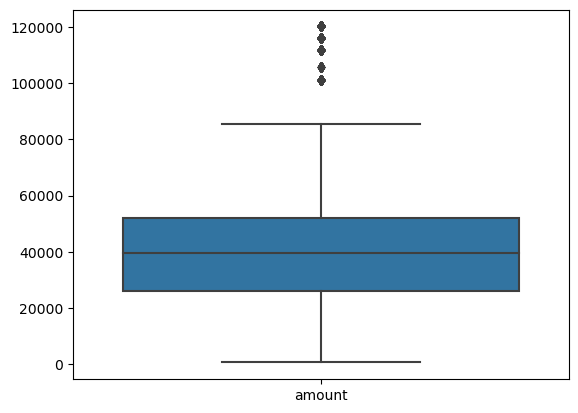

In [150]:
sns.boxplot(data = df[['amount']])


In [151]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df = df[(df['amount'] > lower) & (df['amount'] < upper)]

C:\Users\Riyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='productScale', ylabel='count'>

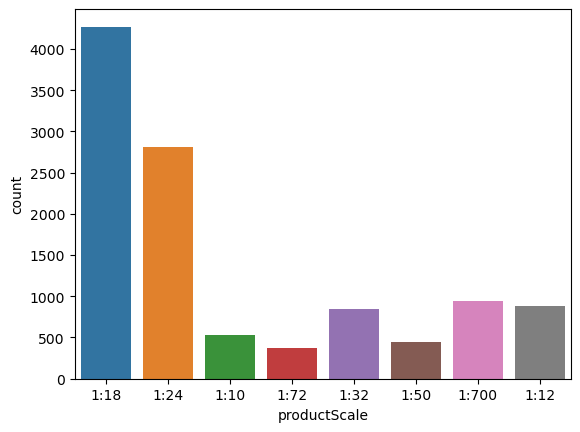

In [152]:
sns.countplot(df['productScale'])

C:\Users\Riyad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

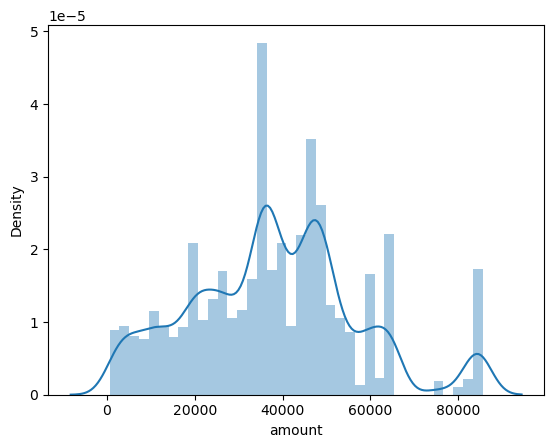

In [153]:
sns.distplot(df['amount'])